In [1]:
#hands on linear reg in R Lesson 1
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")

Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.1.3"
Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: ggplot2

Loading required package: lattice

Warning message:
"package 'predictmeans' was built under R version 4.1.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 4.1.3"
Loading required package: Matrix

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


Loading required package: lmeInfo

Warning message:
"package 'lmeInfo' was built under R version 4.1.3"
Loading required package: parallel

Warning message:
"package 'e1071' was built under R version 4.1.3"
Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are m

In [2]:
#use heights.csv file
heights = read.csv('heights.csv')

In [3]:
heights

AM_Height,PM_Height
<dbl>,<dbl>
1728.75,1720.25
1538.25,1528.50
1462.25,1452.50
1782.50,1776.50
1671.00,1667.00
1581.75,1571.00
1673.75,1664.50
1721.75,1708.50
1646.50,1636.00


### Create a Scatterplot to Check for Linearity


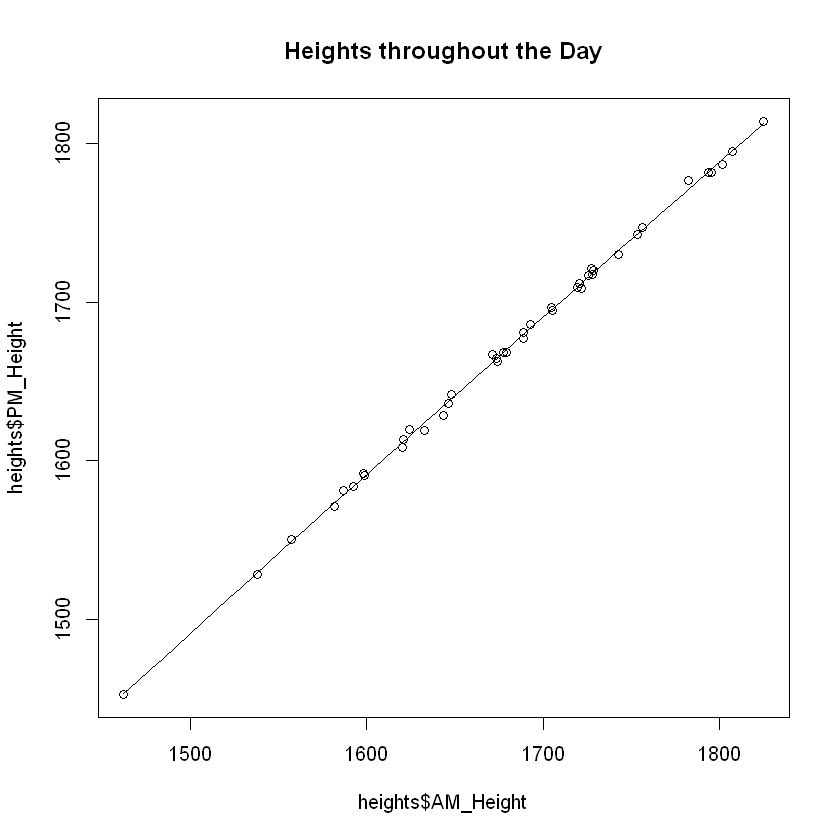

In [6]:
scatter.smooth(x=heights$AM_Height, y=heights$PM_Height, main="Heights throughout the Day")

In [ ]:
# Plot appears pretty linear, so the assumption of linearity has been met.

### Test for Homoscedasticity


In [7]:
# create a linear model
lmMod <- lm(PM_Height~AM_Height, data=heights)

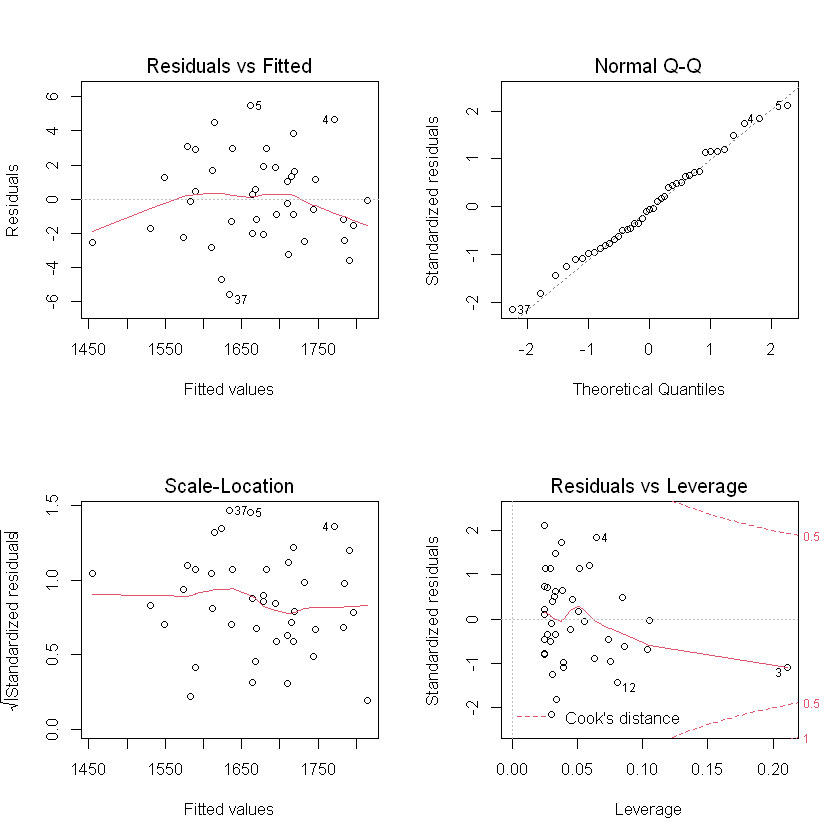

In [8]:
par(mfrow=c(2,2))
plot(lmMod)

In [10]:
#looking at the two left graphs, we are expecting a flat red line horizontally to know if the assumption of 
#homoscedasticity is met. It's hard to tell from this, so run some stats to confirm: BP test

lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 0.2079, df = 1, p-value = 0.6484


In [12]:
# p value in BP test is greater than 0.05, so it is not significant and therefore passes for Homoscedasticity.
#can also run NCV test:
car::ncvTest(lmMod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1519285, Df = 1, p = 0.6967